<a href="https://colab.research.google.com/github/GabrielTrentino/TCC/blob/master/TCC_parte03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/00%20-%20Dados%20Gerais%20(PIB%2C%20SELIC%2C%20DOLAR)%20-%2000%20-%20Dados%20Gerais%20(PIB%2C%20SELIC%2C%20DOLAR)%20(1).csv'
df = pd.read_csv(data_path)
df.index = pd.to_datetime(df.DateTime, format = "%m/%Y")
df.drop(["DateTime"], inplace = True, axis = 1)
df

,PIB,PIB_POR,PIB_Const,PIB_Const_POR,Ibovespa,Dolar,Selic,Desemprego,IPCA_acu_ano,IPCA_mês,Salario,Consc_Credito_Pjuridica,Consc_Credito_Pfisica,Concs_Total,Cesta_Basica
DateTime,,,,,,,,,,,,,,,
2013-01-01,"2,473",NaN,NaN,NaN,"59761,5","2,037",7.14,7.2,6.15,"0,86",678,110270,124895,235165,"287,94"
2013-02-01,"2,473",NaN,NaN,NaN,"57424,3","1,96",7.12,7.7,6.31,"0,6",678,107509,115171,222680,"286,34"
2013-03-01,"2,473",2.2,"68076,199","1,5","56352,1","1,975",7.12,8.0,6.59,"0,47",678,123133,121230,244363,"287,78"
2013-04-01,"2,473",NaN,NaN,NaN,"55910,4","1,979",7.16,7.8,6.49,"0,55",678,126943,131060,258003,"284,22"
2013-05-01,"2,473",NaN,NaN,NaN,"53506,1","2,023",7.40,7.6,6.50,"0,37",678,138061,131734,269795,"293,96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,NaN,NaN,NaN,NaN,"101134,6","4,138",6.00,11.8,3.43,"0,11",998,139675,159893,299568,"420,55"
2019-09-01,NaN,1.0,"61202,591","0,4","104745,3","4,164",6.00,11.8,2.89,"-0,04",998,149510,158811,308321,"399,4"
2019-10-01,NaN,NaN,NaN,NaN,"107219,8","4,004",5.50,11.6,2.54,"0,1",998,142616,168511,311127,"391,31"


In [0]:
df.PIB = df.PIB.str.replace(',','.').astype(float)
df.PIB_Const = df.PIB_Const.str.replace(',','.').astype(float)
df.PIB_Const_POR = df.PIB_Const_POR.str.replace(',','.').astype(float)
df.Ibovespa = df.Ibovespa.str.replace(',','.').astype(float)
df.Dolar = df.Dolar.str.replace(',','.').astype(float)
df.IPCA_mês = df.IPCA_mês.str.replace(',','.').astype(float)
df.Cesta_Basica = df.Cesta_Basica.str.replace(',','.').astype(float)
df.dtypes

PIB                        float64
PIB_POR                    float64
PIB_Const                  float64
PIB_Const_POR              float64
Ibovespa                   float64
Dolar                      float64
Selic                      float64
Desemprego                 float64
IPCA_acu_ano               float64
IPCA_mês                   float64
Salario                      int64
Consc_Credito_Pjuridica      int64
Consc_Credito_Pfisica        int64
Concs_Total                  int64
Cesta_Basica               float64
dtype: object

In [0]:
df.interpolate(method='linear', inplace = True)
df.fillna(df[df.index < "2013-06"].mean(), inplace = True)
df.head()

,PIB,PIB_POR,PIB_Const,PIB_Const_POR,Ibovespa,Dolar,Selic,Desemprego,IPCA_acu_ano,IPCA_mês,Salario,Consc_Credito_Pjuridica,Consc_Credito_Pfisica,Concs_Total,Cesta_Basica
DateTime,,,,,,,,,,,,,,,
2013-01-01,2.473,2.433333,69845.314667,2.0,59761.5,2.037,7.14,7.2,6.15,0.86,678,110270,124895,235165,287.94
2013-02-01,2.473,2.433333,69845.314667,2.0,57424.3,1.960,7.12,7.7,6.31,0.60,678,107509,115171,222680,286.34
2013-03-01,2.473,2.200000,68076.199000,1.5,56352.1,1.975,7.12,8.0,6.59,0.47,678,123133,121230,244363,287.78
2013-04-01,2.473,2.433333,69845.314667,2.0,55910.4,1.979,7.16,7.8,6.49,0.55,678,126943,131060,258003,284.22
2013-05-01,2.473,2.666667,71614.430333,2.5,53506.1,2.023,7.40,7.6,6.50,0.37,678,138061,131734,269795,293.96


In [0]:
metragem_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/00%20-%20CUSTO%20DA%20METRAGEM%20POR%20TIPO%20DE%20CONSTRU%C3%87%C3%83O%20E%20ACABAMENTO%20-%2000%20-%20CUSTO%20DA%20METRAGEM%20POR%20TIPO%20DE%20CONSTRU%C3%87%C3%83O%20E%20ACABAMENTO.csv'
df_metragem = pd.read_csv(metragem_path)
df_metragem.rename(columns = {"Unnamed: 0":"Datas"}, inplace = True)
df_metragem.index = pd.to_datetime(df_metragem["Datas"], format = "%m/%Y")
df_metragem.drop("Datas", axis = 1, inplace=True)
df_metragem.head(1)

,Tipo,Alto,Normal,Baixo,Mínimo
Datas,,,,,
2013-01-01,Tipo1,NaN,870.37,602.98,521.04


In [0]:
df_new = pd.DataFrame()
df_new['Tipo1Norm'] = df_metragem.query("Tipo == 'Tipo1'").Normal
df_new['Tipo1Baix'] = df_metragem.query("Tipo == 'Tipo1'").Baixo
df_new['Tipo1Mini'] = df_metragem.query("Tipo == 'Tipo1'").Mínimo
df_new['Tipo2Norm'] = df_metragem.query("Tipo == 'Tipo2'").Normal
df_new['Tipo2Baix'] = df_metragem.query("Tipo == 'Tipo2'").Baixo
df_new['Tipo2Mini'] = df_metragem.query("Tipo == 'Tipo2'").Mínimo
df_new['Tipo3Norm'] = df_metragem.query("Tipo == 'Tipo3'").Normal
df_new['Tipo3Baix'] = df_metragem.query("Tipo == 'Tipo3'").Baixo
df_new['Tipo3Mini'] = df_metragem.query("Tipo == 'Tipo3'").Mínimo
df_new['Tipo4Norm'] = df_metragem.query("Tipo == 'Tipo4'").Normal
df_new['Tipo4Baix'] = df_metragem.query("Tipo == 'Tipo4'").Baixo
df_new['Tipo4Alto'] = df_metragem.query("Tipo == 'Tipo4'").Alto
df_new['Tipo5Norm'] = df_metragem.query("Tipo == 'Tipo5'").Normal
df_new['Tipo5Baix'] = df_metragem.query("Tipo == 'Tipo5'").Baixo
df_new['Tipo5Mini'] = df_metragem.query("Tipo == 'Tipo5'").Mínimo
df_new['Tipo6Norm'] = df_metragem.query("Tipo == 'Tipo6'").Normal
df_new['Tipo6Baix'] = df_metragem.query("Tipo == 'Tipo6'").Baixo
df_new['Tipo6Mini'] = df_metragem.query("Tipo == 'Tipo6'").Mínimo
df_new['Tipo7Norm'] = df_metragem.query("Tipo == 'Tipo7'").Normal
df_new['Tipo7Baix'] = df_metragem.query("Tipo == 'Tipo7'").Baixo
df_new['Tipo7Mini'] = df_metragem.query("Tipo == 'Tipo7'").Mínimo
df_new.head()

,Tipo1Norm,Tipo1Baix,Tipo1Mini,Tipo2Norm,Tipo2Baix,Tipo2Mini,Tipo3Norm,Tipo3Baix,Tipo3Mini,Tipo4Norm,Tipo4Baix,Tipo4Alto,Tipo5Norm,Tipo5Baix,Tipo5Mini,Tipo6Norm,Tipo6Baix,Tipo6Mini,Tipo7Norm,Tipo7Baix,Tipo7Mini
Datas,,,,,,,,,,,,,,,,,,,,,
2013-01-01,870.37,602.98,521.04,978.80,677.45,585.42,974.20,691.48,606.03,829.03,571.12,965.66,1057.24,732.23,637.00,898.10,679.06,604.82,777.92,591.22,523.65
2013-02-01,870.62,604.88,522.83,979.16,679.57,587.40,974.54,693.58,607.96,829.04,572.85,966.19,1057.70,734.44,639.12,898.29,680.33,605.94,778.22,592.35,524.66
2013-03-01,870.31,607.91,525.92,978.74,682.83,590.76,973.66,696.25,610.94,828.13,575.29,970.03,1056.91,737.74,642.73,898.31,682.23,607.91,777.37,593.68,526.26
2013-04-01,874.64,610.41,532.68,983.89,686.07,598.62,978.81,700.02,619.04,832.38,577.69,976.14,1062.74,741.86,651.17,903.33,687.61,615.31,782.43,598.32,533.55
2013-05-01,824.72,575.44,499.21,928.02,646.83,561.19,922.75,659.55,580.28,785.26,544.56,925.62,1002.98,699.59,610.51,849.22,646.01,575.18,739.02,564.45,500.71


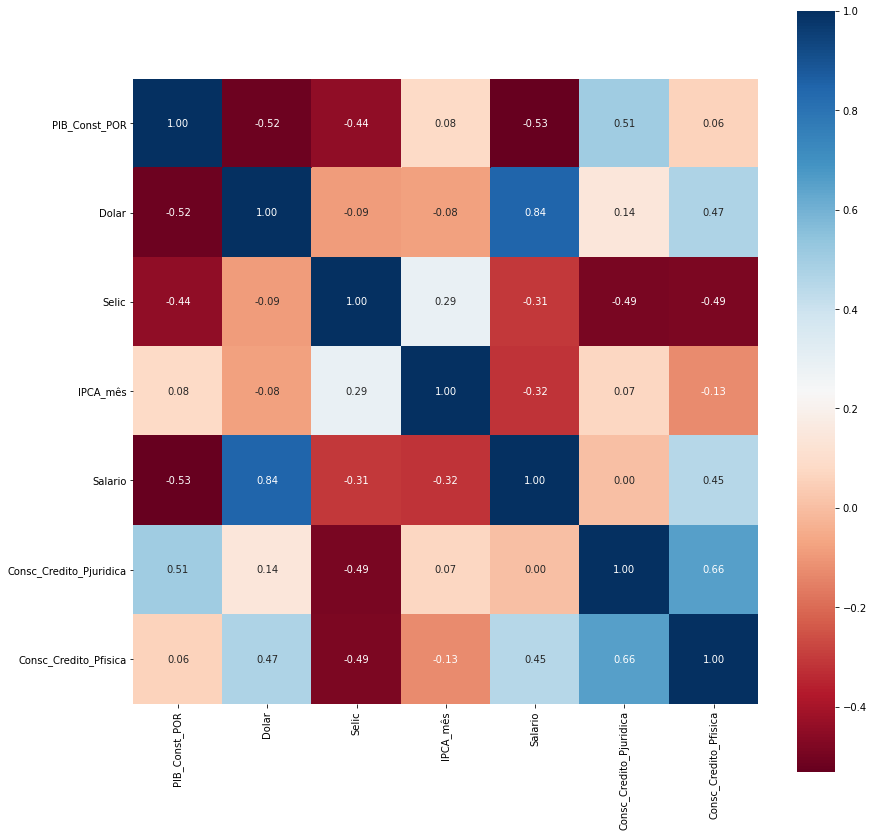

In [0]:
df_correlacao_total = pd.concat([df, df_new.Tipo1Norm], axis = 1, sort=False)
df_correlacao_total.drop(['Concs_Total', 'PIB_Const', 'PIB_POR', 'Ibovespa', 'IPCA_acu_ano', 'PIB', 'Cesta_Basica', 'Desemprego', 'Tipo1Norm'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(df_correlacao_total.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [0]:
df.drop(['Concs_Total', 'PIB_Const_POR', 'PIB_POR', 'IPCA_acu_ano', 'Consc_Credito_Pjuridica'],axis = 1, inplace = True)
df

,PIB,PIB_Const,Ibovespa,Dolar,Selic,Desemprego,IPCA_mês,Salario,Consc_Credito_Pfisica,Cesta_Basica
DateTime,,,,,,,,,,
2013-01-01,2.473,69845.314667,59761.5,2.037,7.14,7.2,0.86,678,124895,287.94
2013-02-01,2.473,69845.314667,57424.3,1.960,7.12,7.7,0.60,678,115171,286.34
2013-03-01,2.473,68076.199000,56352.1,1.975,7.12,8.0,0.47,678,121230,287.78
2013-04-01,2.473,69845.314667,55910.4,1.979,7.16,7.8,0.55,678,131060,284.22
2013-05-01,2.473,71614.430333,53506.1,2.023,7.40,7.6,0.37,678,131734,293.96
...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.869,59906.992000,101134.6,4.138,6.00,11.8,0.11,998,159893,420.55
2019-09-01,1.869,61202.591000,104745.3,4.164,6.00,11.8,-0.04,998,158811,399.40
2019-10-01,1.869,59975.475333,107219.8,4.004,5.50,11.6,0.10,998,168511,391.31


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train = df_correlacao_total[df_correlacao_total.index < "2019"]
X_test = df_correlacao_total[df_correlacao_total.index >= "2019"]
y_train = df_new[df_new.index < '2019'].Tipo1Norm
y_test = df_new[df_new.index >= '2019'].Tipo1Norm

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print('R² = {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
print('RMSE = {:.2f}'.format(metrics.mean_squared_error(y_test,y_pred, squared = True)))

R² = -0.30
RMSE = 916.10


In [0]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Define PLS object
pls = PLSRegression(n_components=5)

# Fit
pls.fit(df, df_new)

# Cross-validation
y_cv = cross_val_predict(pls, df, df_new, cv=10)

# Calculate scores
score = r2_score(df_new, y_cv)
mse = mean_squared_error(df_new, y_cv)
y_cv = pd.DataFrame(y_cv)
y_cv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,875.569160,613.502887,533.310702,985.359918,689.913734,599.970233,981.470774,706.398688,622.324634,833.769280,581.912704,978.626873,1066.833455,746.386525,652.782050,901.817415,690.603120,615.143625,783.666682,602.079459,534.291353
1,869.455145,605.417849,527.100319,978.288775,680.687973,592.782863,974.140043,697.024585,614.829403,827.634769,574.087022,972.029267,1059.931151,736.943904,645.316876,894.319480,681.716480,607.939229,777.149035,594.093909,527.762862
2,872.825229,607.949496,529.073885,982.061114,683.600695,595.060369,978.262967,700.199803,617.432358,830.965314,576.473366,976.375750,1064.239159,740.179113,647.784430,897.427220,684.313064,610.176088,780.103865,596.572990,529.758987
3,881.388038,614.187711,534.187683,991.685432,690.650378,600.840149,988.104230,707.444848,623.525196,839.235174,582.360223,984.483097,1074.266651,747.689518,653.990628,906.660207,691.504969,616.206301,787.599697,602.633970,534.902624
4,876.333871,612.781948,533.415776,986.221196,689.121259,600.018732,982.404083,705.834151,622.599874,834.182590,581.010449,981.097133,1068.410023,745.967901,653.119153,902.331702,689.813160,615.181134,784.023280,601.257113,534.175213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1202.881130,841.389448,728.541205,1353.395310,945.796673,819.818492,1342.865176,964.239432,848.071226,1139.243763,793.348263,1316.035209,1458.514267,1022.585462,892.992822,1245.197065,948.232628,838.892172,1063.863047,818.513813,724.440134
80,1207.885752,845.585177,733.081993,1359.156584,950.539335,824.918009,1348.654056,969.449443,853.642863,1143.543814,797.171391,1322.271920,1465.018666,1027.974031,898.805516,1251.476412,953.416645,844.073280,1068.551460,822.554081,728.777254
81,1206.175133,848.594934,734.750744,1357.447683,954.117320,827.050516,1347.741043,973.441140,856.254148,1142.456364,800.343108,1321.630192,1462.955284,1031.442761,900.794799,1250.624599,956.453868,846.170620,1068.704211,825.943337,731.093403
82,1209.399027,854.071466,738.597000,1361.140300,960.303639,831.528125,1351.599664,979.647345,860.918824,1145.720345,805.677003,1324.273546,1466.263966,1037.622910,905.388104,1255.012271,962.453773,850.797561,1072.441332,831.361516,735.307965


#Ignora essa parte de baixo:

In [0]:
# R = 0
# contador = 0
# valido = 0
# while R < 0.95:
#   n = random.randint(1, 10)
#   df_embaralhado = df.sample(n = n, axis = 1)
#   X_train = df_embaralhado[df_embaralhado.index < '2019']
#   X_test = df_embaralhado[df_embaralhado.index >= '2019']

#   for nome, dados in df_new.iteritems():
#     y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
#     y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])
#     contador +=1
#     modelo = LinearRegression()
#     modelo.fit(X_train, y_train)
#     y_pred = modelo.predict(X_test)
#     R = metrics.r2_score(y_test, y_pred)
#     if R > 0.82:
#       valido += 1
#       print(nome)
#       print('Valores Válidos {} de {}'. format(valido, contador))
#       print("{:.4f}".format(R))
#       print('RMSE = {}'.format(metrics.mean_squared_error(y_test, y_pred)))
#       lista = list(X_train.columns)
#       lista.sort()
#       print(lista)
#       print(len(list(X_train.columns)), '\n')

#Primeira Tentativa :)

In [0]:
from scipy.stats import ks_2samp

df_melhor = df[['Dolar', 'PIB', 'Selic', 'Consc_Credito_Pfisica']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']

y_train = pd.DataFrame(df_new[df_new.index < '2019'].Tipo1Norm)
y_test = pd.DataFrame(df_new[df_new.index >= '2019'].Tipo1Norm)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
R2 = metrics.r2_score(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
y_pred = np.ravel(y_pred)
KS = ks_2samp(y_pred, y_test.Tipo1Norm)

print('Utilizando Dolar, PIB, Selic e Consc_Credito_Pfisica:')
print('R² = {:.4f}'.format(R2))
print('RMSE = {:.3f}'.format(RMSE))
print('KS = {}'.format(KS))

Utilizando Dolar, PIB, Selic e Consc_Credito_Pfisica:
R² = 0.7728
RMSE = 12.645
KS = Ks_2sampResult(statistic=0.25, pvalue=0.8689816711757754)


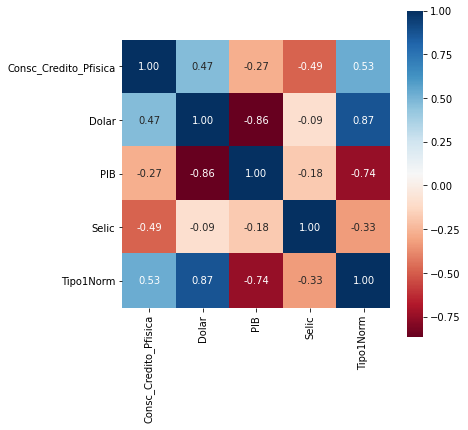

In [0]:
fig, ax = plt.subplots(figsize = (6,6))
correlacao = pd.concat([df[['Consc_Credito_Pfisica', 'Dolar', 'PIB', 'Selic']], df_new.Tipo1Norm], axis = 1)
sns.heatmap(correlacao.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [0]:
df_melhor = df[['Dolar', 'PIB', 'Selic', 'Consc_Credito_Pfisica']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])

  resultados.append([nome, R2, RMSE, KS[0], KS[1], modelo.intercept_[0], modelo.coef_[0][0], modelo.coef_[0][1], modelo.coef_[0][2], modelo.coef_[0][3]])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", "RMSE", "KS", "p-value", 'Intecepto', 'Beta1', 'Beta2', 'Beta3', 'Beta4'])
resultados[resultados.R2 > 0.75]

,Tipo,R2,RMSE,KS,p-value,Intecepto,Beta1,Beta2,Beta3,Beta4
0,Tipo1Norm,0.772819,12.644916,0.250000,0.868982,1016.028838,96.119019,-103.045397,-10.489817,0.000187
3,Tipo2Norm,0.785000,13.984478,0.250000,0.868982,1139.207783,108.011029,-114.814030,-11.885955,0.000227
6,Tipo3Norm,0.794211,13.262780,0.250000,0.868982,1124.435097,105.403266,-112.129877,-11.862893,0.000289
9,Tipo4Norm,0.769285,11.977029,0.333333,0.536098,971.779275,88.518967,-99.932462,-9.834591,0.000211
12,Tipo5Norm,0.800006,14.227372,0.250000,0.868982,1227.405127,114.434516,-122.879434,-12.588161,0.000274
15,Tipo6Norm,0.764729,13.255521,0.250000,0.868982,1008.804017,102.932908,-93.890165,-11.384446,0.000234
18,Tipo7Norm,0.790519,10.185431,0.250000,0.868982,879.943589,81.603285,-83.306653,-9.386711,0.000276


In [0]:
y_pred

array([676.47197936, 678.68154312, 687.33138809, 693.74448521,
       695.73429146, 685.54945368, 688.73459575, 710.56449992,
       711.60338714, 709.80627472, 724.6951996 , 720.51106599])

In [0]:
y_test

,Tipo7Mini
Datas,
2019-01-01,695.11
2019-02-01,697.03
2019-03-01,702.06
2019-04-01,701.81
2019-05-01,700.71
2019-06-01,706.03
2019-07-01,705.33
2019-08-01,723.82
2019-09-01,725.01


In [0]:
#print(((y_test.Tipo1Norm - y_pred)**2).sum())
#print(np.mean((y_test.Tipo1Norm - y_pred)**2))
#print(np.sqrt(np.mean((y_test.Tipo1Norm - y_pred)**2)))

#Segunda Tentativa :)

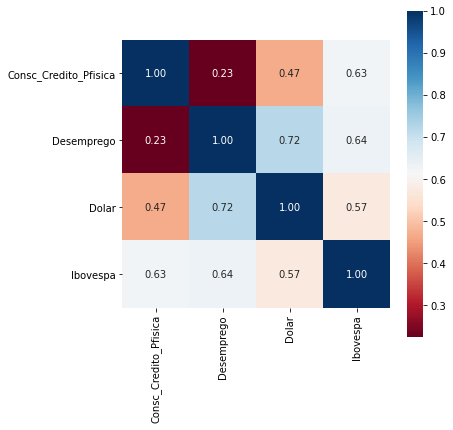

In [0]:
fig, ax = plt.subplots(figsize = (6,6))
correlacao = df[['Consc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]
sns.heatmap(correlacao.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [0]:
 modelo.coef_[0][0]

54.51340592555703

In [0]:
df_melhor = df[['Consc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])
  y_pred = pd.DataFrame(y_pred, index=y_test.index)
  std = (y_pred[0]-y_test[nome]).std()
  resultados.append([nome, R2, RMSE, KS[0], KS[1]])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", "RMSE", "KS", "p-value"])
resultados[resultados.R2 > 0.8].round(3)

,Tipo,R2,RMSE,KS,p-value
1,Tipo1Baix,0.829,7.704,0.250,0.869
2,Tipo1Mini,0.869,6.324,0.250,0.869
4,Tipo2Baix,0.839,8.518,0.333,0.536
5,Tipo2Mini,0.876,6.906,0.250,0.869
8,Tipo3Mini,0.875,6.997,0.333,0.536
10,Tipo4Baix,0.805,7.677,0.333,0.536
13,Tipo5Baix,0.841,9.095,0.333,0.536
14,Tipo5Mini,0.872,7.596,0.250,0.869
16,Tipo6Baix,0.843,8.265,0.333,0.536
17,Tipo6Mini,0.884,6.549,0.250,0.869


In [0]:
df_melhor = df[['Consc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])
  y_pred = pd.DataFrame(y_pred, index=y_test.index)
  std = (y_pred[0]-y_test[nome]).std()
  resultados.append([nome, R2, modelo.intercept_[0].round(3), modelo.coef_[0][0].round(5), modelo.coef_[0][1].round(3), modelo.coef_[0][2].round(3), modelo.coef_[0][3].round(5)])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", 'Intercepto', 'Beta1', 'Beta2', 'Beta3', 'Beta4'])
resultados[resultados.R2 > 0.8]

,Tipo,R2,Intercepto,Beta1,Beta2,Beta3,Beta4
1,Tipo1Baix,0.829487,286.163,0.00068,10.199,39.987,0.00155
2,Tipo1Mini,0.868747,257.837,0.00056,9.168,31.756,0.00134
4,Tipo2Baix,0.839236,320.600,0.00077,11.329,44.784,0.00176
5,Tipo2Mini,0.876346,287.552,0.00065,10.151,35.989,0.00152
8,Tipo3Mini,0.875332,295.976,0.00070,10.118,36.489,0.00163
10,Tipo4Baix,0.805352,274.183,0.00065,9.188,37.894,0.00146
13,Tipo5Baix,0.841136,346.826,0.00085,12.708,47.036,0.00187
14,Tipo5Mini,0.872142,312.116,0.00071,11.386,38.473,0.00164
16,Tipo6Baix,0.842952,321.384,0.00078,11.737,45.019,0.00169
17,Tipo6Mini,0.883716,299.610,0.00065,10.340,36.624,0.00154


AttributeError: ignored

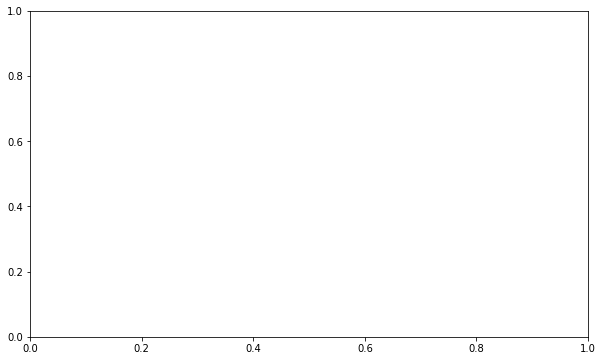

In [0]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
#sns.regplot(resultados.iloc[0].y_train, resultados.iloc[0].y_pred)
#plt.scatter(resultados.iloc[0].y_train.index, resultados.iloc[0].y_train)
plt.scatter(resultados.iloc[0].y_test.index, resultados.iloc[0].y_test)
plt.scatter(resultados.iloc[0].y_pred.index, resultados.iloc[0].y_pred)
#eq = resultados.iloc[0].Intercepto + resultados.iloc[0].Beta1*df.Consc_Credito_Pfisica + resultados.iloc[0].Beta2*df.Desemprego + resultados.iloc[0].Beta3*df.Dolar + resultados.iloc[0].Beta4*df.Ibovespa
#plt.plot(eq.index, eq)
plt.title('R² = {:.3f}, RMSE = {:.2f}, std = {:.3f}'.format(R2, RMSE, std), fontweight="bold", fontsize = 16)
plt.xlabel('Valores Reais', fontsize = 14)
plt.ylabel('Valores Previstos', fontsize = 14);

In [0]:
# treino = resultados.iloc[0].y_train.values.reshape(-1,1)
# teste = resultados.iloc[0].y_test.values.reshape(-1,1)
# pred = resultados.iloc[0].y_pred.values.reshape(-1,1)

# fig, ax = plt.subplots(figsize=(10,6))
# eq = resultados.iloc[0].Intercepto + resultados.iloc[0].Beta1*df.Consc_Credito_Pfisica + resultados.iloc[0].Beta2*df.Desemprego + resultados.iloc[0].Beta3*df.Dolar + resultados.iloc[0].Beta4*df.Ibovespa
# sns.regplot(eq, treino, color='blue',)
# sns.regplot(eq, teste, color='green')

# plt.title('R² = {:.3f}, RMSE = {:.2f}, std = {:.3f}'.format(R2, RMSE, std), fontweight="bold", fontsize = 16)
# plt.xlabel('Valores Reais', fontsize = 14)
# plt.ylabel('Valores Previstos', fontsize = 14);

In [0]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(resultados.iloc[0].y_test, resultados.iloc[0].y_pred, ax = ax)
plt.title('R² = {:.3f}, RMSE = {:.2f}, std = {:.3f}'.format(R2, RMSE, std), fontweight="bold", fontsize = 16)
plt.xlabel('Valores Reais', fontsize = 14)
plt.ylabel('Valores Previstos', fontsize = 14);

#Terceira Tentativa :)

In [0]:
df_melhor = df[['Cesta_Basica', 'Consc_Credito_Pfisica', 'Desemprego', 'IPCA_mês', 'Ibovespa', 'PIB_Const', 'Salario']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])

  resultados.append([nome, R2, RMSE, KS[0], KS[1]])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", "RMSE", "KS", "p-value"])
resultados[resultados.R2 > 0.75]

A


In [0]:
df_melhor = df[['Consc_Credito_Pfisica', 'Desemprego', 'Dolar', 'Ibovespa']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']
resultados = []
for nome, dados in df_new.iteritems():
  y_train = pd.DataFrame(df_new[df_new.index < '2019'][nome])
  y_test = pd.DataFrame(df_new[df_new.index >= '2019'][nome])

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  R2 = metrics.r2_score(y_test, y_pred)
  RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
  y_pred = np.ravel(y_pred)
  KS = ks_2samp(y_pred, y_test[nome])
  y_pred = pd.DataFrame(y_pred, index=y_test.index)
  std = (y_pred[0]-y_test[nome]).std()
  resultados.append([nome, R2, y_test, y_pred, y_train])
resultados = pd.DataFrame(resultados, columns=["Tipo", "R2", 'y_test', 'y_pred', 'y_train'])
resultados = resultados[resultados.R2 > 0.8]

,Tipo,R2,y_test,y_pred,y_train
1,Tipo1Baix,0.829487,Tipo1Baix Datas 20...,0 Datas ...,Tipo1Baix Datas 20...
2,Tipo1Mini,0.868747,Tipo1Mini Datas 20...,0 Datas ...,Tipo1Mini Datas 20...
4,Tipo2Baix,0.839236,Tipo2Baix Datas 20...,0 Datas ...,Tipo2Baix Datas 20...
5,Tipo2Mini,0.876346,Tipo2Mini Datas 20...,0 Datas ...,Tipo2Mini Datas 20...
8,Tipo3Mini,0.875332,Tipo3Mini Datas 20...,0 Datas ...,Tipo3Mini Datas 20...
10,Tipo4Baix,0.805352,Tipo4Baix Datas 20...,0 Datas ...,Tipo4Baix Datas 20...
13,Tipo5Baix,0.841136,Tipo5Baix Datas 20...,0 Datas ...,Tipo5Baix Datas 20...
14,Tipo5Mini,0.872142,Tipo5Mini Datas 20...,0 Datas ...,Tipo5Mini Datas 20...
16,Tipo6Baix,0.842952,Tipo6Baix Datas 20...,0 Datas ...,Tipo6Baix Datas 20...
17,Tipo6Mini,0.883716,Tipo6Mini Datas 20...,0 Datas ...,Tipo6Mini Datas 20...


In [0]:
df_new.to_csv('Treinos.csv')

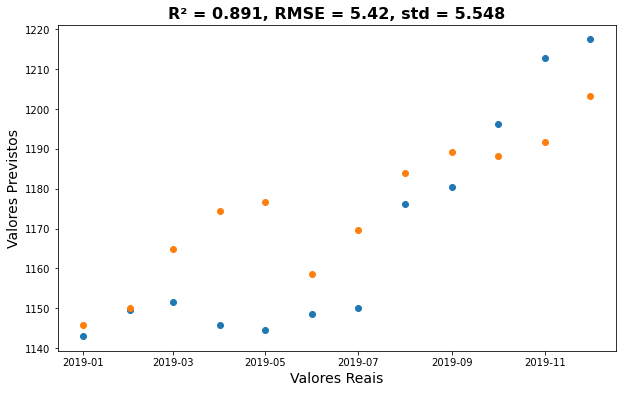

In [0]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
#sns.regplot(resultados.iloc[0].y_train, resultados.iloc[0].y_pred)
#plt.scatter(resultados.iloc[0].y_train.index, resultados.iloc[0].y_train)
plt.scatter(resultados.iloc[0].y_test.index, resultados.iloc[0].y_test)
plt.scatter(resultados.iloc[0].y_pred.index, resultados.iloc[0].y_pred)
#eq = resultados.iloc[0].Intercepto + resultados.iloc[0].Beta1*df.Consc_Credito_Pfisica + resultados.iloc[0].Beta2*df.Desemprego + resultados.iloc[0].Beta3*df.Dolar + resultados.iloc[0].Beta4*df.Ibovespa
#plt.plot(eq.index, eq)
plt.title('R² = {:.3f}, RMSE = {:.2f}, std = {:.3f}'.format(R2, RMSE, std), fontweight="bold", fontsize = 16)
plt.xlabel('Valores Reais', fontsize = 14)
plt.ylabel('Valores Previstos', fontsize = 14);

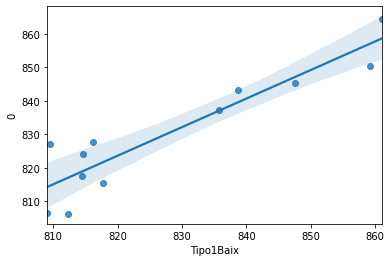

In [0]:

ax = sns.regplot(x="y_test", y="y_pred", data=resultados.iloc[1])